In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [9]:
pwd

'C:\\Users\\Mohamed Suhaib\\ML_Hackathon'

In [427]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

(37656, 9)

In [429]:
train["data"] = "train"
test["data"] = "test"

In [430]:
data = pd.concat([train,test])

In [431]:
data = data.reset_index().drop(columns="index")

In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125520 entries, 0 to 125519
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Item_ID               125520 non-null  object 
 1   Item_W                125520 non-null  float64
 2   Item_Type             125520 non-null  object 
 3   Item_MRP              125520 non-null  float64
 4   Outlet_ID             125520 non-null  object 
 5   Outlet_Year           125520 non-null  int64  
 6   Outlet_Size           125520 non-null  object 
 7   Outlet_Location_Type  125520 non-null  object 
 8   Sales                 87864 non-null   float64
 9   data                  125520 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 9.6+ MB


In [433]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_W,125520.0,14.782266,4.427802,4.598804,10.465685,14.553760,19.376857,21.250000
Item_MRP,125520.0,149.634197,60.185944,32.910015,110.163563,143.892967,196.590199,265.214271
Outlet_Year,125520.0,1999.919328,6.710208,1987.000000,1997.000000,1999.000000,2004.000000,2009.000000
Sales,87864.0,1911.842120,1291.386004,-1229.360345,959.249675,1606.307877,2608.057736,10309.283310


In [434]:
data.isna().sum()

Item_ID                     0
Item_W                      0
Item_Type                   0
Item_MRP                    0
Outlet_ID                   0
Outlet_Year                 0
Outlet_Size                 0
Outlet_Location_Type        0
Sales                   37656
data                        0
dtype: int64

In [435]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train
...,...,...,...,...,...,...,...,...,...,...
125515,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,NaN,test
125516,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,NaN,test
125517,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,NaN,test
125518,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,NaN,test


# Assumption or Intution

Outlet level 

1. Location           - Available
2. Population         - No
3. Size               - Available
4. Outlet Age         - Available
5. Advertisement      - No
6. No OF Employees    - No
7. Customer Service   - No 
8. Brand              - No
9. Quality            - No
10. Competitor        - No
11. Timing            - No



Product Level

1. Quality                  - NO
2. Pricing                  - Avaliable
3. Discount                 - No
4. Frequent use of Product  - Available
5. Visibility               - No
6. Avaliabilty              - No
7. Advertisement            - No


# Data attributes: 
#### Item_ID: Item Identification Number
####  Item_W: Item Weight
####  Item_Type: Item
####  Item_MRP: MRP of the Product
####  Outlet_ID: Outlet ID
####  Outlet_Year: Outlet Establishment year
####  Outlet_Size: Size of the outlet
####  Outlet_Type: Type of the outlet
####  Sales: Total sales from the outlet

In [449]:
numerical_columns = data.select_dtypes(include=np.number).drop(columns=['Outlet_Year','Sales']).columns

In [437]:
category_columns = data.select_dtypes(exclude=np.number).columns

In [448]:
numerical_columns

Index(['Item_W', 'Item_MRP'], dtype='object')

In [439]:
data[category_columns].apply(lambda x: x.nunique())

Item_ID                 896
Item_Type                16
Outlet_ID                 5
Outlet_Size               3
Outlet_Location_Type      3
data                      2
dtype: int64

In [450]:
data[category_columns].apply(lambda x: print(x.value_counts()))

FDE11    603
NCE07    527
NCL18    498
FDD51    459
NCO06    450
        ... 
FDC32      3
FDI12      2
DRF60      2
FDD39      2
FDA22      2
Name: Item_ID, Length: 896, dtype: int64
Fruits and Vegetables    18775
Baking Goods             16435
Snack Foods              14679
Household                10827
Frozen Foods              9490
Meat                      9412
Canned                    7978
Soft Drinks               7574
Dairy                     7296
Health and Hygiene        5268
Others                    4233
Breads                    3966
Hard Drinks               3721
Starchy Foods             3401
Seafood                   1274
Breakfast                 1191
Name: Item_Type, dtype: int64
OUT035    32093
OUT046    29022
OUT018    25737
OUT013    19698
OUT049    18970
Name: Outlet_ID, dtype: int64
Small     62118
Medium    41919
High      21483
Name: Outlet_Size, dtype: int64
Tier 1    46397
Tier 3    44776
Tier 2    34347
Name: Outlet_Location_Type, dtype: int64
train    87

Item_ID                 None
Item_Type               None
Outlet_ID               None
Outlet_Size             None
Outlet_Location_Type    None
data                    None
dtype: object

Observation:<br>
    1. Item_Identifier - aplha(3)numeric(2)<br>
    3. Item_Type - Group - check the relation with Item_Identifier<br>
    4. Outlet_Identifier - Nothing<br>
    5. Outlet_Size - Relation Outlet_Size and Outlet_Type<br>
    6. Outlet_Location_Type<br>
    7. Outlet_Type<br>

In [441]:
data[numerical_columns].isna().sum()

Item_W      0
Item_MRP    0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='Outlet_ID'>

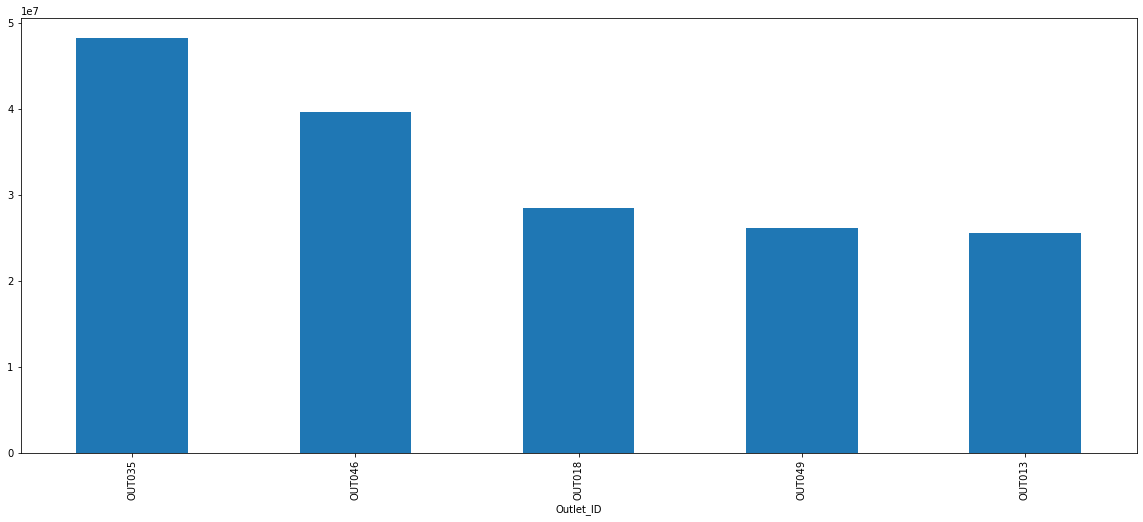

In [451]:
data.groupby("Outlet_ID").Sales.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='Outlet_Age,Outlet_ID'>

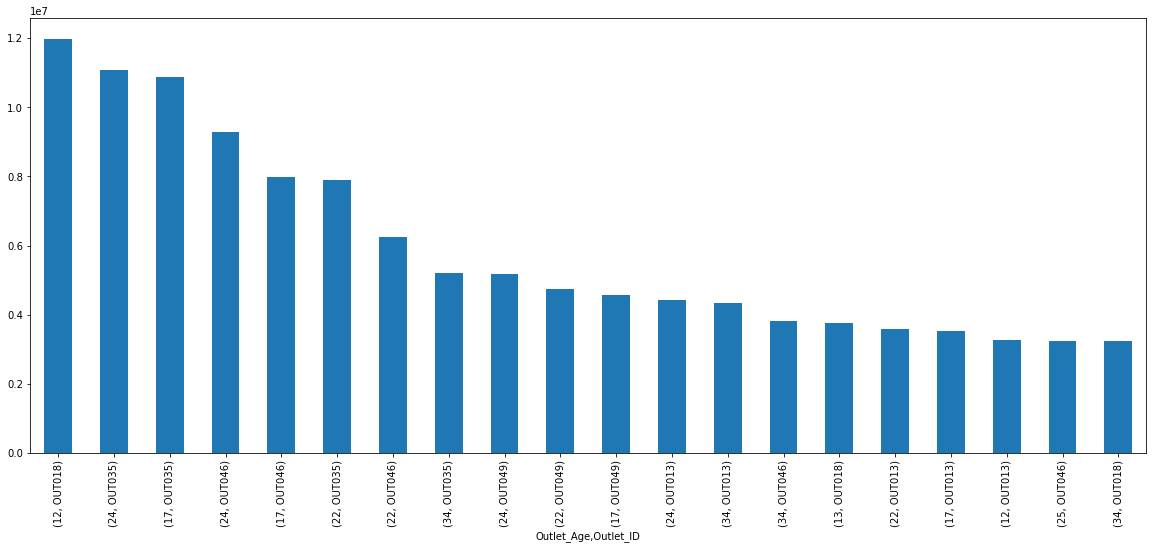

In [452]:
data.groupby(["Outlet_Age","Outlet_ID"]).Sales.sum().sort_values(ascending=False).head(20).plot(kind = "bar")

In [453]:
data.groupby("Outlet_ID").Sales.count().sort_values(ascending=False)

Outlet_ID
OUT035    24071
OUT046    20850
OUT018    17156
OUT049    13356
OUT013    12431
Name: Sales, dtype: int64

In [454]:
data[data['Outlet_ID'] == 'OUT013']['Outlet_Age']

19        25
38        17
62        24
72        24
78        24
          ..
125498    12
125501    13
125506    17
125510    12
125512    12
Name: Outlet_Age, Length: 19698, dtype: int64

In [455]:
data.groupby('Outlet_ID').sum('Sales')

,Item_W,Item_MRP,Outlet_Year,Sales,Outlet_Age
Outlet_ID,,,,,
OUT013,290917.106462,2.952810e+06,39370620,2.560086e+07,439038
OUT018,381100.033204,3.728370e+06,51561996,2.845250e+07,452481
OUT035,474335.337946,4.844157e+06,64157324,4.816965e+07,702629
OUT046,427594.599169,4.387963e+06,58016340,3.960731e+07,637122
OUT049,281522.938628,2.868784e+06,37923594,2.615177e+07,414776


In [456]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data,Outlet_Age
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train,17
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train,34
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train,22
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train,25
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train,33
...,...,...,...,...,...,...,...,...,...,...,...
125515,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,NaN,test,12
125516,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,NaN,test,12
125517,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,NaN,test,24
125518,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,NaN,test,12


In [457]:
data.columns

Index(['Item_ID', 'Item_W', 'Item_Type', 'Item_MRP', 'Outlet_ID',
       'Outlet_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Sales', 'data',
       'Outlet_Age'],
      dtype='object')

<AxesSubplot:xlabel='Item_ID'>

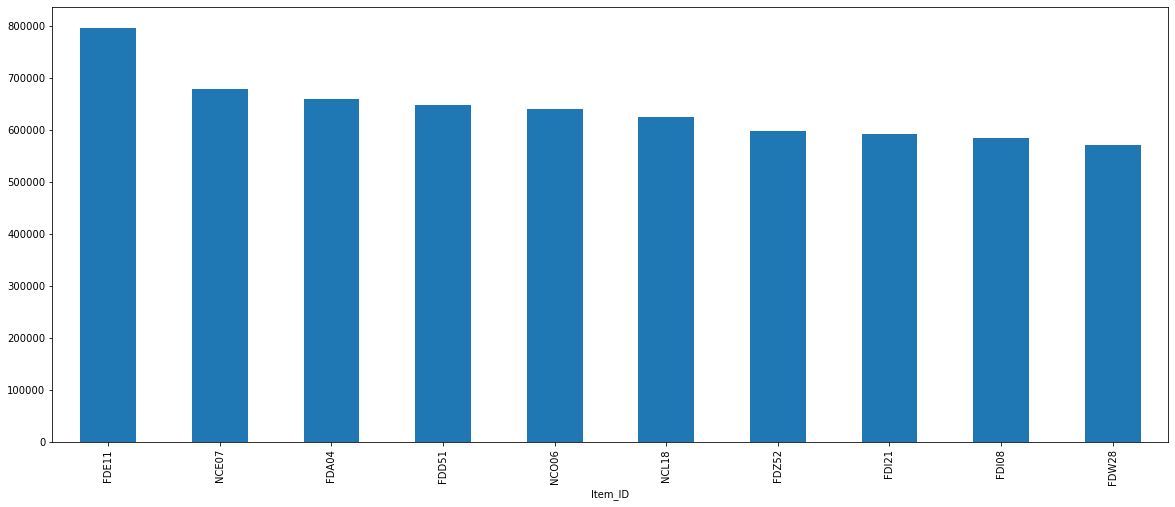

In [458]:
data.groupby("Item_ID").Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

<AxesSubplot:xlabel='Outlet_Location_Type'>

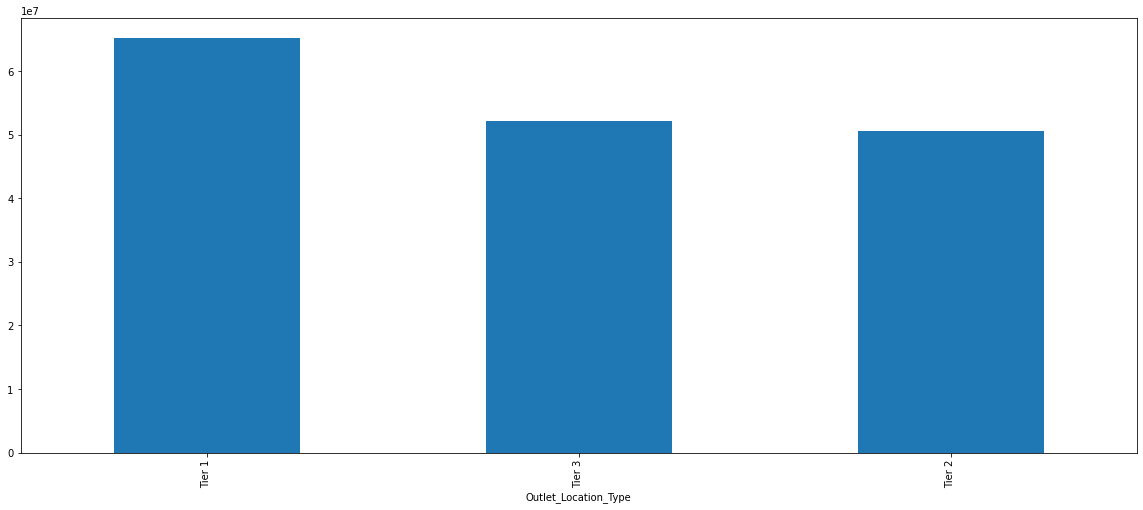

In [459]:
data.groupby("Outlet_Location_Type").Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

In [ ]:
data.groupby("Item_Type").Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Type'>

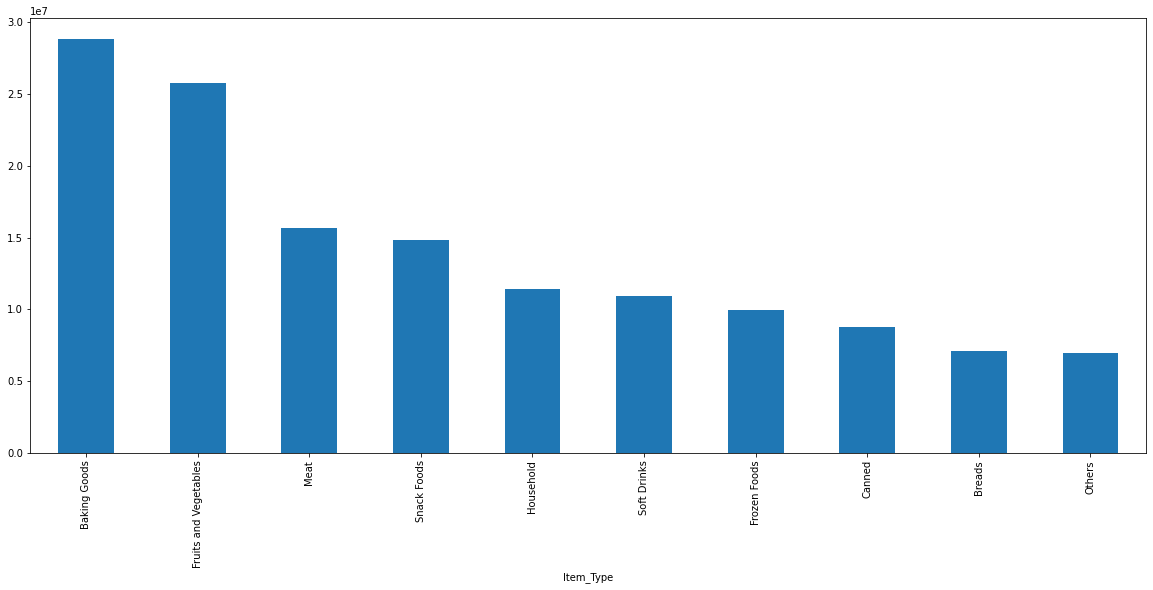

In [460]:
data.groupby("Item_Type").Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

In [461]:
train.groupby(["Item_ID","Outlet_ID"])

#### Higher Sales by Item ID and Outlet_ID

<AxesSubplot:xlabel='Item_ID,Outlet_ID'>

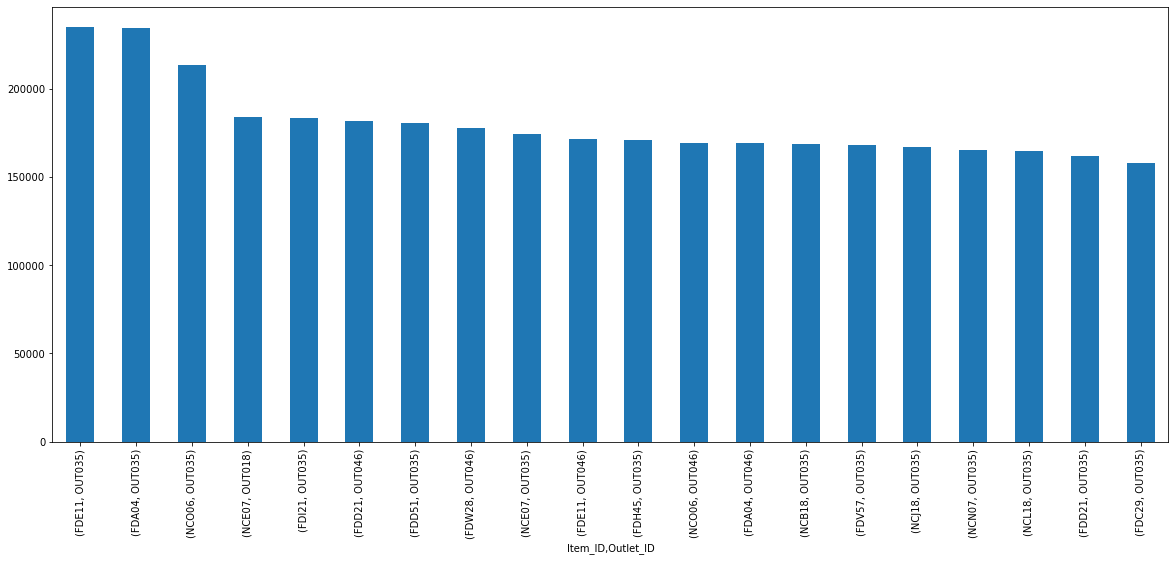

In [462]:
train.groupby(["Item_ID","Outlet_ID"]).Sales.sum().sort_values(ascending=False).head(20).plot(kind = "bar")

#### Lower Sales by Item ID and Outlet_ID

<AxesSubplot:xlabel='Item_ID,Outlet_ID'>

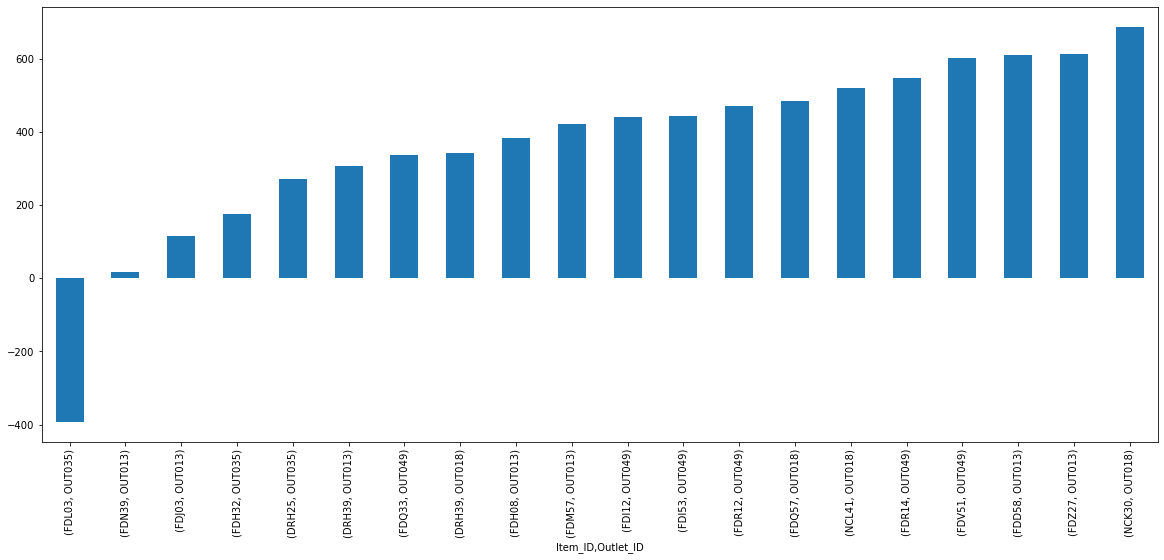

In [463]:
train.groupby(["Item_ID","Outlet_ID"]).Sales.sum().sort_values(ascending=True).head(20).plot(kind = "bar")

In [464]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [466]:
train.groupby(["Item_ID","Outlet_ID"]).Sales.sum().sort_values(ascending=False).head(40)

Item_ID  Outlet_ID
FDE11    OUT035       234780.136772
FDA04    OUT035       234545.262219
NCO06    OUT035       213587.450913
NCE07    OUT018       184200.060826
FDI21    OUT035       183664.289765
FDD21    OUT046       181441.352555
FDD51    OUT035       180483.768392
FDW28    OUT046       177773.649364
NCE07    OUT035       174566.282072
FDE11    OUT046       171507.570111
FDH45    OUT035       170992.394288
NCO06    OUT046       169068.748411
FDA04    OUT046       168958.777954
NCB18    OUT035       168704.984330
FDV57    OUT035       168222.063341
NCJ18    OUT035       167147.636699
NCN07    OUT035       165363.214993
NCL18    OUT035       164926.869646
FDD21    OUT035       161941.850815
FDC29    OUT035       158153.686278
FDR21    OUT035       157941.726099
FDM08    OUT046       156935.991708
FDZ52    OUT018       156670.411848
FDI08    OUT035       155736.773093
FDD52    OUT035       155422.861353
FDZ43    OUT035       154660.886468
NCJ29    OUT035       152749.227424
NCN07    

In [467]:
train.groupby(["Item_ID","Outlet_ID"]).Sales.sum().sort_values(ascending=False).head(40)

Item_ID  Outlet_ID
FDE11    OUT035       234780.136772
FDA04    OUT035       234545.262219
NCO06    OUT035       213587.450913
NCE07    OUT018       184200.060826
FDI21    OUT035       183664.289765
FDD21    OUT046       181441.352555
FDD51    OUT035       180483.768392
FDW28    OUT046       177773.649364
NCE07    OUT035       174566.282072
FDE11    OUT046       171507.570111
FDH45    OUT035       170992.394288
NCO06    OUT046       169068.748411
FDA04    OUT046       168958.777954
NCB18    OUT035       168704.984330
FDV57    OUT035       168222.063341
NCJ18    OUT035       167147.636699
NCN07    OUT035       165363.214993
NCL18    OUT035       164926.869646
FDD21    OUT035       161941.850815
FDC29    OUT035       158153.686278
FDR21    OUT035       157941.726099
FDM08    OUT046       156935.991708
FDZ52    OUT018       156670.411848
FDI08    OUT035       155736.773093
FDD52    OUT035       155422.861353
FDZ43    OUT035       154660.886468
NCJ29    OUT035       152749.227424
NCN07    

In [468]:

train.groupby(["Item_ID","Outlet_ID"]).Sales.sum().sort_values(ascending=True).head(100)

Item_ID  Outlet_ID
FDL03    OUT035       -392.899955
FDN39    OUT013         15.502287
FDJ03    OUT013        114.015814
FDH32    OUT035        174.786812
DRH25    OUT035        271.152253
DRH39    OUT013        306.268000
FDQ33    OUT049        337.527780
DRH39    OUT018        340.886783
FDH08    OUT013        383.638653
FDM57    OUT013        422.092156
FDI12    OUT049        439.428000
FDI53    OUT049        442.712695
FDR12    OUT049        471.294040
FDQ57    OUT018        484.371054
NCL41    OUT018        519.425872
FDR14    OUT049        546.347239
FDV51    OUT049        600.392141
FDD58    OUT013        609.318559
FDZ27    OUT013        611.842921
NCK30    OUT018        687.040628
FDS25    OUT013        705.162945
FDC15    OUT018        721.453640
FDD46    OUT049        725.416205
FDD41    OUT049        733.685017
FDB05    OUT018        744.009417
FDU24    OUT018        744.905736
FDR33    OUT046        745.171624
FDT12    OUT013        755.642804
FDM57    OUT035        763.48

In [470]:
train[(train['Item_ID']=='FDE11') & (train['Outlet_ID'] =='OUT013')].head(20)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
929,FDE11,20.282132,Hard Drinks,197.853788,OUT013,1998,Small,Tier 2,1434.052385,train
2158,FDE11,20.266920,Meat,154.291467,OUT013,1997,Small,Tier 1,2666.616172,train
3182,FDE11,20.585300,Others,204.020389,OUT013,1999,Small,Tier 1,3750.223263,train
4903,FDE11,19.810077,Starchy Foods,110.842989,OUT013,2008,Medium,Tier 3,1361.691165,train
5171,FDE11,19.944325,Others,123.725297,OUT013,2008,High,Tier 3,1476.617527,train
5902,FDE11,20.030876,Meat,55.377506,OUT013,1997,Small,Tier 3,883.778748,train
7442,FDE11,19.942072,Meat,106.253397,OUT013,2008,High,Tier 1,1596.788933,train
8168,FDE11,20.591923,Seafood,78.236057,OUT013,1987,High,Tier 1,3635.477080,train
14620,FDE11,21.228856,Canned,117.494584,OUT013,1999,Medium,Tier 2,767.110337,train
15146,FDE11,21.164507,Frozen Foods,128.865672,OUT013,1999,High,Tier 3,2013.280235,train


In [538]:
train[(train['Item_ID']=='FDE11') & (train['Outlet_ID'] =='OUT035')]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
390,FDE11,20.921588,Meat,162.468549,OUT035,1997,Small,Tier 1,521.529017,train
557,FDE11,21.221947,Baking Goods,134.192158,OUT035,1997,Small,Tier 2,3094.071559,train
814,FDE11,19.518214,Baking Goods,111.735428,OUT035,1987,Small,Tier 2,1503.398630,train
1643,FDE11,20.636882,Baking Goods,118.249781,OUT035,1997,Small,Tier 2,1464.013131,train
2543,FDE11,20.544473,Baking Goods,190.885480,OUT035,1999,Small,Tier 1,3199.946392,train
2833,FDE11,20.983758,Fruits and Vegetables,111.612193,OUT035,1998,Small,Tier 1,4237.832695,train
2995,FDE11,20.259569,Hard Drinks,209.506703,OUT035,1999,Small,Tier 2,1656.735454,train
4428,FDE11,20.320588,Baking Goods,126.230415,OUT035,2004,Medium,Tier 1,4101.619464,train
5511,FDE11,20.124126,Baking Goods,134.834975,OUT035,1996,Medium,Tier 1,6319.443039,train
5833,FDE11,19.843289,Meat,69.207116,OUT035,1997,Small,Tier 2,1951.324471,train


### Lower Sales by Item ID and Outlet ID

In [473]:
train[(train['Item_ID']=='FDL03')].groupby('Outlet_ID').count()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
Outlet_ID,,,,,,,,,
OUT013,3,3,3,3,3,3,3,3,3
OUT018,3,3,3,3,3,3,3,3,3
OUT035,1,1,1,1,1,1,1,1,1
OUT049,3,3,3,3,3,3,3,3,3


In [474]:
train[(train['Item_ID']=='FDL03') & (train['Outlet_ID'] =='OUT035')]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
51485,FDL03,11.491762,Fruits and Vegetables,112.332587,OUT035,2004,Small,Tier 1,-392.899955,train


In [475]:
train[(train['Item_ID']=='FDL03')].groupby('Item_Type').count()

,Item_ID,Item_W,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
Item_Type,,,,,,,,,
Baking Goods,2,2,2,2,2,2,2,2,2
Fruits and Vegetables,3,3,3,3,3,3,3,3,3
Hard Drinks,1,1,1,1,1,1,1,1,1
Household,1,1,1,1,1,1,1,1,1
Meat,2,2,2,2,2,2,2,2,2
Starchy Foods,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='Outlet_ID'>

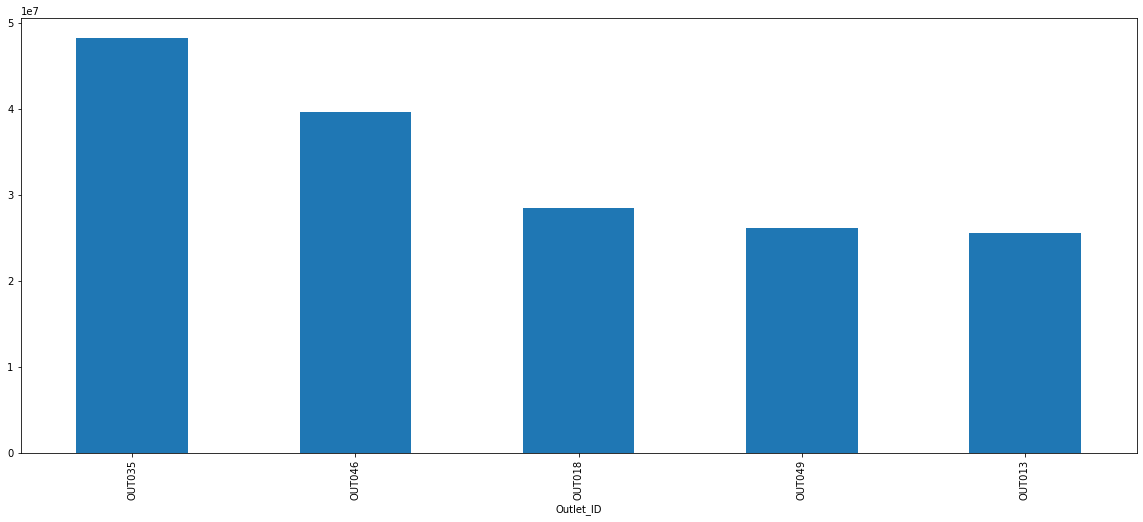

In [476]:
data.groupby("Outlet_ID").Sales.sum().sort_values(ascending=False).plot(kind = "bar")

In [477]:
train[(train['Item_ID']=='FDE11')].groupby('Outlet_ID').count()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
Outlet_ID,,,,,,,,,
OUT013,73,73,73,73,73,73,73,73,73
OUT018,78,78,78,78,78,78,78,78,78
OUT035,113,113,113,113,113,113,113,113,113
OUT046,92,92,92,92,92,92,92,92,92
OUT049,63,63,63,63,63,63,63,63,63


In [478]:
train[(train['Item_ID']=='FDE11')].groupby('Item_Type').count()

,Item_ID,Item_W,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
Item_Type,,,,,,,,,
Baking Goods,58,58,58,58,58,58,58,58,58
Breads,14,14,14,14,14,14,14,14,14
Breakfast,1,1,1,1,1,1,1,1,1
Canned,32,32,32,32,32,32,32,32,32
Dairy,22,22,22,22,22,22,22,22,22
Frozen Foods,21,21,21,21,21,21,21,21,21
Fruits and Vegetables,72,72,72,72,72,72,72,72,72
Hard Drinks,17,17,17,17,17,17,17,17,17
Health and Hygiene,13,13,13,13,13,13,13,13,13


### Higher Sales by Item ID and Outlet ID

In [479]:
train[(train['Item_ID']=='FDA04')].groupby('Outlet_ID').count()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
Outlet_ID,,,,,,,,,
OUT013,39,39,39,39,39,39,39,39,39
OUT018,29,29,29,29,29,29,29,29,29
OUT035,102,102,102,102,102,102,102,102,102
OUT046,99,99,99,99,99,99,99,99,99
OUT049,49,49,49,49,49,49,49,49,49


In [ ]:
train[train(['Item_ID'] == 'FDA04' & train['Outlet_ID'] == 'OUT035') ]

In [481]:
data[data.duplicated()].sum()

Item_ID                 0.0
Item_W                  0.0
Item_Type               0.0
Item_MRP                0.0
Outlet_ID               0.0
Outlet_Year             0.0
Outlet_Size             0.0
Outlet_Location_Type    0.0
Sales                   0.0
data                    0.0
Outlet_Age              0.0
dtype: float64

In [289]:
cross = pd.crosstab(train['Sales'],train['Item_Type'])

In [290]:
cross

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Sales,,,,,,,,,,,,,,,,
-1229.360345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
-859.248126,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-762.750511,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
-669.891835,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-601.320050,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226.330112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9351.239250,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9457.092997,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [284]:
def AttrPercentageBar(x, y,z,w,h):
    matplotlib.rcParams["figure.figsize"] = (w,h)
    cross = pd.crosstab(train[x],train[y])
    cross.div(cross.sum(1),axis = 0).plot(kind = "bar", stacked = z, rot=60)

In [ ]:
AttrPercentageBar("Item_ID", "Sales",True,20,8)

In [ ]:
AttrPercentageBar("Outlet_Location_Type", "Sales",True,20,8)

In [ ]:
AttrPercentageBar("Sales", "Item_Type",True,20,8)

In [ ]:
AttrPercentageBar("Outlet_ID", "Sales",True,20,8)

# Future Engineering

In [482]:
data["Outlet_Age"] = 2021 - data["Outlet_Year"]

In [483]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data,Outlet_Age
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train,17
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train,34
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train,22
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train,25
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train,33
...,...,...,...,...,...,...,...,...,...,...,...
125515,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,NaN,test,12
125516,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,NaN,test,12
125517,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,NaN,test,24
125518,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,NaN,test,12


In [111]:
data["Item_ID_Grp"] = data["Item_ID"].apply(lambda x : x[0:2])

In [484]:
data2= data.copy()
del data["Outlet_Year"]

### Data Preparation

In [485]:
data['Outlet_Age'].max()

34

In [486]:
data.select_dtypes(include = np.number).corr()

,Item_W,Item_MRP,Sales,Outlet_Age
Item_W,1.000000,0.000556,0.000615,-0.002453
Item_MRP,0.000556,1.000000,0.014813,0.014450
Sales,0.000615,0.014813,1.000000,0.035701
Outlet_Age,-0.002453,0.014450,0.035701,1.000000


<AxesSubplot:>

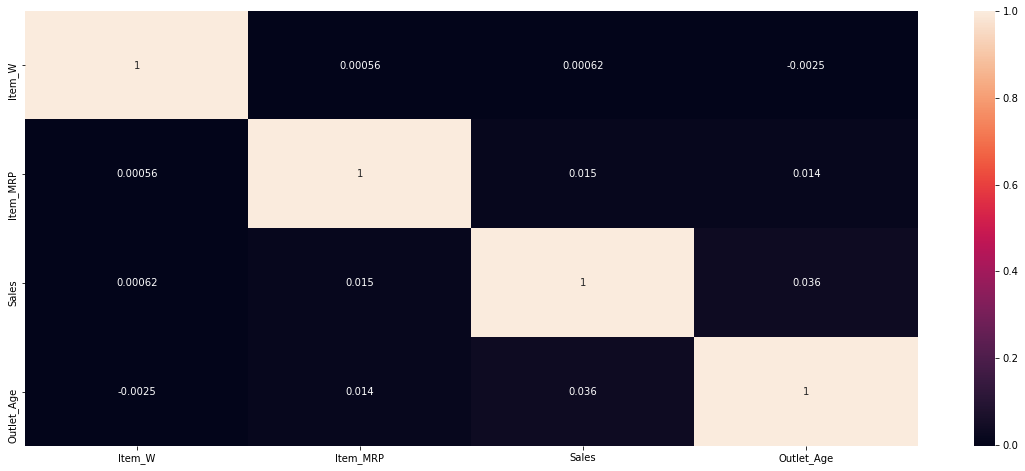

In [487]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

In [488]:
category_data_columns

Index(['Item_Type', 'Outlet_ID', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Identifier_group1', 'Item_ID_Grp'],
      dtype='object')

In [489]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Item_ID","data"]).columns

In [490]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Sales").columns

In [491]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [492]:
scaler = StandardScaler()

In [493]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [494]:
pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns]).columns

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_ID_OUT013',
       'Outlet_ID_OUT018', 'Outlet_ID_OUT035', 'Outlet_ID_OUT046',
       'Outlet_ID_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Item_W',
       'Item_MRP', 'Outlet_Age'],
      dtype='object')

In [495]:
preprocess_numeric_data_columns

,Item_W,Item_MRP,Outlet_Age
0,1.410465,0.792848,-0.608131
1,1.427374,-0.022995,1.925332
2,1.377664,0.927642,0.137005
3,1.415644,1.724386,0.584087
4,1.460236,1.515922,1.776305
...,...,...,...
125515,-1.897623,0.476861,-1.353268
125516,-1.836644,0.007297,-1.353268
125517,-2.061362,-0.035291,0.435059
125518,-1.830998,-0.941885,-1.353268


In [496]:
pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns], axis = 1)

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Age
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1.410465,0.792848,-0.608131
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1.427374,-0.022995,1.925332
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.377664,0.927642,0.137005
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1.415644,1.724386,0.584087
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.460236,1.515922,1.776305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.897623,0.476861,-1.353268
125516,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.836644,0.007297,-1.353268
125517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,-2.061362,-0.035291,0.435059
125518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.830998,-0.941885,-1.353268


In [497]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Item_ID","data", "Sales"]]], axis = 1)

In [498]:
final_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Age,Item_ID,data,Sales
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1.410465,0.792848,-0.608131,FDU32,train,2689.457781
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1.427374,-0.022995,1.925332,NCT54,train,3437.350375
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.377664,0.927642,0.137005,FDW08,train,3129.967268
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1.415644,1.724386,0.584087,FDJ22,train,1306.514376
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.460236,1.515922,1.776305,FDF47,train,1739.769829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.897623,0.476861,-1.353268,FDY27,test,NaN
125516,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.836644,0.007297,-1.353268,FDK38,test,NaN
125517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,-2.061362,-0.035291,0.435059,DRF01,test,NaN
125518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.830998,-0.941885,-1.353268,FDR58,test,NaN


In [499]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [500]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [501]:
test_preprocessed = test_preprocessed.drop(columns = ["data"])

In [502]:
train_preprocessed.to_csv("train_preprocessed.csv")
test_preprocessed.to_csv("test_preprocessed.csv")

In [503]:
train_X = train_preprocessed.drop(columns=["Item_ID","Sales","data"])

In [504]:
train_y = train_preprocessed["Sales"]

In [505]:
test_preprocessed.columns

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_ID_OUT013',
       'Outlet_ID_OUT018', 'Outlet_ID_OUT035', 'Outlet_ID_OUT046',
       'Outlet_ID_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Item_W',
       'Item_MRP', 'Outlet_Age', 'Item_ID', 'Sales'],
      dtype='object')

In [506]:
test_X1 = test_preprocessed.drop(columns=["Item_ID","Sales"])

In [507]:
test_X1.shape

(37656, 30)

In [508]:
test_y1 = test_preprocessed['Sales']

In [509]:
test_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Age,Item_ID,Sales
87864,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,-1.044663,-0.503686,0.137005,DRM23,NaN
87865,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,-0.981945,1.893577,1.925332,FDG47,NaN
87866,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,-0.638847,1.605909,0.435059,FDN21,NaN
87867,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.037554,-0.223204,-0.608131,FDZ23,NaN
87868,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-0.836135,0.390649,-1.353268,FDC16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.897623,0.476861,-1.353268,FDY27,NaN
125516,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.836644,0.007297,-1.353268,FDK38,NaN
125517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,-2.061362,-0.035291,0.435059,DRF01,NaN
125518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,-1.830998,-0.941885,-1.353268,FDR58,NaN


In [510]:
test_preprocessed.columns

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_ID_OUT013',
       'Outlet_ID_OUT018', 'Outlet_ID_OUT035', 'Outlet_ID_OUT046',
       'Outlet_ID_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Item_W',
       'Item_MRP', 'Outlet_Age', 'Item_ID', 'Sales'],
      dtype='object')

# MODEL

In [511]:
train_X, test_X, train_y, test_y = train_test_split(train_X,train_y,test_size=0.2)

In [512]:
def model_fit1(model, train_X, test_X, train_y, test_y):
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    train_acc = mean_squared_error(train_y, train_pred)
    test_acc = mean_squared_error(test_y, test_pred )
    print(model)
    print("Train Accuracy = ", train_acc)
    print("Test Accuracy = ", test_acc)
    return train_acc, test_acc

In [513]:
model = RandomForestRegressor(bootstrap='False')

In [514]:
model

RandomForestRegressor(bootstrap='False')

In [515]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap='False')

In [516]:
train_pred = model.predict(train_X)
train_pred

array([1886.17774469, 1577.11530346, 1594.80327576, ..., 4431.98280731,
       2103.77636895,  561.70660337])

In [517]:
test_pred = model.predict(test_X)
test_pred

array([1576.08305587, 2941.70174957, 2461.41780908, ..., 2110.17915941,
       2378.74898973, 1855.35069352])

In [518]:
train_acc = mean_squared_error(train_y, train_pred)
train_acc

244192.106563738

In [519]:
ElasticNet(alpha=1.0, l1_ratio=0.5)
Ridge(alpha=10)
LinearRegression()
Lasso(10)


Lasso(alpha=10)

In [520]:
run_model = [LinearRegression(),Lasso(5),Ridge(alpha=10),ElasticNet(alpha=1.0, l1_ratio=0.5),DecisionTreeRegressor(), RandomForestRegressor(bootstrap='False'),AdaBoostRegressor(),
            GradientBoostingRegressor(),KNeighborsRegressor()]

model_name = ['LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor',
            'GradientBoostingRegressor','KNeighborsRegressor',]

In [521]:
train_X.shape

(70291, 30)

In [522]:
test_X.shape

(17573, 30)

In [523]:
sample_submission = pd.DataFrame()

In [524]:
train_acc = []
test_acc = []
for i in run_model:
    trainacc, testacc = model_fit1(i,train_X,test_X,train_y,test_y)
    train_acc.append(trainacc)
    test_acc.append(testacc)

LinearRegression()
Train Accuracy =  1640008.1052619594
Test Accuracy =  1654078.908795133
Lasso(alpha=5)
Train Accuracy =  1642767.8103647914
Test Accuracy =  1656687.284959622
Ridge(alpha=10)
Train Accuracy =  1639996.8059235937
Test Accuracy =  1654081.0402686112
ElasticNet()
Train Accuracy =  1650064.0126566864
Test Accuracy =  1663135.3273661325
DecisionTreeRegressor()
Train Accuracy =  0.0
Test Accuracy =  3395994.8193129366
RandomForestRegressor(bootstrap='False')
Train Accuracy =  243405.95796172318
Test Accuracy =  1765330.9254921263
AdaBoostRegressor()
Train Accuracy =  1996361.9043013602
Test Accuracy =  2029319.211662542
GradientBoostingRegressor()
Train Accuracy =  1607419.817935538
Test Accuracy =  1640299.1660234423
KNeighborsRegressor()
Train Accuracy =  1298149.5587894616
Test Accuracy =  1969619.6917542026


In [526]:
pd.DataFrame([train_acc,test_acc],columns=model_name).T

,0,1
LinearRegression,1.640008e+06,1.654079e+06
Lasso,1.642768e+06,1.656687e+06
Ridge,1.639997e+06,1.654081e+06
ElasticNet,1.650064e+06,1.663135e+06
DecisionTreeRegressor,0.000000e+00,3.395995e+06
RandomForestRegressor,2.434060e+05,1.765331e+06
AdaBoostRegressor,1.996362e+06,2.029319e+06
GradientBoostingRegressor,1.607420e+06,1.640299e+06
KNeighborsRegressor,1.298150e+06,1.969620e+06


In [ ]:
# Voting 

In [213]:
clf1 = ElasticNet(alpha=1.0, l1_ratio=0.5)
clf2 = AdaBoostRegressor()
clf3 = GradientBoostingRegressor()
clf4 = Ridge(alpha=10)
eclf1 = VotingRegressor(estimators=[('en',clf1),('ab',clf2),('gnb',clf3),('ri',clf4)])

In [214]:
eclf1.fit(train_X, train_y)

VotingRegressor(estimators=[('en', ElasticNet()), ('ab', AdaBoostRegressor()),
                            ('gnb', GradientBoostingRegressor()),
                            ('ri', Ridge(alpha=10))])

In [ ]:
# Stacking

In [ ]:
train_pred = eclf1.predict(train_X)
test_pred = eclf1.predict(test_X)
train_acc = mean_squared_error(train_y, train_pred )
test_acc = mean_squared_error(test_y, test_pred )
print(eclf1)
print("Train RMSE = ", train_acc)
print("Test RMSE = ", test_acc)

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [ ('lr', clf1), ('rf', clf2), ('gnb', clf3)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(train_X, train_y)

In [219]:
from sklearn.ensemble import StackingRegressor
estimators = [('en',clf1),('ab',clf2),('gnb',clf3),('ri',clf4)]
clf = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
clf.fit(train_X, train_y)

StackingRegressor(estimators=[('en', ElasticNet()), ('ab', AdaBoostRegressor()),
                              ('gnb', GradientBoostingRegressor()),
                              ('ri', Ridge(alpha=10))],
                  final_estimator=LinearRegression())

In [223]:
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)
train_acc = mean_squared_error(train_y, train_pred )
test_acc = mean_squared_error(test_y, test_pred )
print(clf)
print("Train Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

StackingRegressor(estimators=[('en', ElasticNet()), ('ab', AdaBoostRegressor()),
                              ('gnb', GradientBoostingRegressor()),
                              ('ri', Ridge(alpha=10))],
                  final_estimator=LinearRegression())
Train Accuracy =  1615069.7909387234
Test Accuracy =  1602814.160400794


# Feature Importance

In [345]:
random = RandomForestRegressor()

In [346]:
random

RandomForestRegressor()

In [347]:
random.fit(train_X,train_y)

RandomForestRegressor()

In [348]:
random.feature_importances_

array([0.01849895, 0.00939348, 0.00296982, 0.01059925, 0.0075775 ,
       0.0114939 , 0.01750448, 0.00870277, 0.00685919, 0.01311359,
       0.01524489, 0.00968298, 0.00455085, 0.01463138, 0.00768837,
       0.00922983, 0.00781597, 0.00877587, 0.00968683, 0.00194946,
       0.0087784 , 0.00688022, 0.011059  , 0.01135657, 0.01373565,
       0.01231251, 0.01227102, 0.00634244, 0.00901699, 0.00883968,
       0.00634882, 0.0092304 , 0.00869521, 0.31371872, 0.31552465,
       0.04992034])

In [352]:
best_column = pd.Series(random.feature_importances_,index=X.columns).sort_values(ascending=False).index

In [353]:
best_column

Index(['Item_MRP', 'Item_W', 'Outlet_Age', 'Item_Type_Baking Goods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Meat',
       'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 1',
       'Item_Type_Household', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Item_Type_Frozen Foods',
       'Outlet_Size_Small', 'Outlet_Size_Medium', 'Item_Type_Canned',
       'Outlet_ID_OUT035', 'Item_Type_Others', 'Item_Type_Breads',
       'Item_ID_Grp_FD', 'Item_Type_Starchy Foods',
       'Item_Identifier_group1_FD', 'Item_Identifier_group1_NC',
       'Outlet_ID_OUT049', 'Outlet_ID_OUT018', 'Item_Type_Hard Drinks',
       'Item_ID_Grp_NC', 'Outlet_ID_OUT013', 'Item_Type_Soft Drinks',
       'Item_Type_Dairy', 'Outlet_Size_High', 'Item_Type_Health and Hygiene',
       'Item_ID_Grp_DR', 'Item_Identifier_group1_DR', 'Item_Type_Seafood',
       'Item_Type_Breakfast', 'Outlet_ID_OUT046'],
      dtype='object')

 Key Feature  which is making the significance imporvement in the sales

In [ ]:
train['Item_MRP', 'Item_W', 'Outlet_Age', 'Item_Type_Baking Goods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Meat',
       'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 1',
       'Item_Type_Household', 'Outlet_Location_Type_Tier 2']

In [354]:
col = best_column[:10]

In [355]:
col

Index(['Item_MRP', 'Item_W', 'Outlet_Age', 'Item_Type_Baking Goods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Meat',
       'Item_Type_Snack Foods', 'Outlet_Location_Type_Tier 1',
       'Item_Type_Household', 'Outlet_Location_Type_Tier 2'],
      dtype='object')

In [356]:
random.fit(train_X[col], train_y)

RandomForestRegressor()

In [357]:
test_X[col]

,Item_MRP,Item_W,Outlet_Age,Item_Type_Baking Goods,Item_Type_Fruits and Vegetables,Item_Type_Meat,Item_Type_Snack Foods,Outlet_Location_Type_Tier 1,Item_Type_Household,Outlet_Location_Type_Tier 2
54568,-0.453529,0.952600,-0.608131,0,1,0,0,1,0,0
1711,-0.384338,1.357950,0.137005,0,0,0,0,0,0,0
86343,1.755047,-1.083409,1.925332,0,0,0,0,1,1,0
86386,-0.445906,-0.763423,0.435059,0,0,0,0,0,0,1
61710,1.072150,0.392609,-0.608131,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69892,1.580674,-0.116989,0.137005,0,0,0,0,0,0,1
2751,-0.518858,1.394398,0.435059,0,1,0,0,0,0,1
45969,-0.741120,-0.225655,-0.608131,0,0,0,0,0,0,1
4210,-0.318359,1.356355,0.435059,0,0,0,0,0,0,1


In [358]:
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)
train_acc = mean_squared_error(train_y, train_pred )
test_acc = mean_squared_error(test_y, test_pred )
print(clf)
print("Train Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

StackingRegressor(estimators=[('en', ElasticNet()), ('ab', AdaBoostRegressor()),
                              ('gnb', GradientBoostingRegressor()),
                              ('ri', Ridge(alpha=10))],
                  final_estimator=LinearRegression())
Train Accuracy =  1615069.7909387234
Test Accuracy =  1602814.160400794


In [ ]:
train_pred = random.predict(train_X)

In [ ]:
train_pred = random.predict(train_X[col])
test_pred = random.predict(test_X[col])
train_acc = mean_squared_error(train_y,train_pred)
test_acc = mean_squared_error(test_y,test_pred)
print(random)
print("Train Accuracy = ", train_acc)
print("Test Accuracy = ", test_acc)

In [384]:
test_X.shape

(17573, 36)

In [ ]:
Elastic Net 

In [363]:
model_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_net.fit(train_X,train_y)

ElasticNet()

In [389]:
y_net_predict = model_net.predict(test_X1)

In [390]:
X = X.reset_index().drop(columns="index")

In [391]:
y_net_predict

array([1942.87238265, 1911.30205559, 1911.90908526, ..., 1942.87598339,
       1761.63792019, 1761.18345723])

In [392]:
y_net_predict.shape

(37656,)

In [382]:
test.shape

(37656, 9)

In [393]:
submission.shape

(37656, 1)

In [394]:
submission["Sales"] = y_net_predict

In [293]:
# submission["Item_Outlet_Sales"] = y_pred

In [395]:
submission

,Sales
0,1942.872383
1,1911.302056
2,1911.909085
3,1872.194010
4,1777.403692
...,...
37651,1771.531075
37652,1773.525031
37653,1942.875983
37654,1761.637920


In [396]:
submission['Item_Outlet_Sales'] = np.abs(submission['Sales'])

In [397]:
submission.to_csv("submission.csv", index = False)

In [399]:
submission = pd.read_csv("submission.csv")
submission

,Sales,Item_Outlet_Sales
0,1942.872383,1942.872383
1,1911.302056,1911.302056
2,1911.909085,1911.909085
3,1872.194010,1872.194010
4,1777.403692,1777.403692
...,...,...
37651,1771.531075,1771.531075
37652,1773.525031,1773.525031
37653,1942.875983,1942.875983
37654,1761.637920,1761.637920


In [10]:
pwd

'C:\\Users\\Mohamed Suhaib\\ML_Hackathon'

In [287]:
# Polynomial function

In [287]:
we need to understand how data looks vary when checking the coef_

In [374]:
train_X

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Identifier_group1_DR,Item_Identifier_group1_FD,Item_Identifier_group1_NC,Item_ID_Grp_DR,Item_ID_Grp_FD,Item_ID_Grp_NC,Item_W,Item_MRP,Outlet_Age
30340,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,-0.100373,0.552606,1.925332
71508,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,-0.522491,0.588079,0.435059
69958,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,-0.321543,-0.566788,0.435059
58447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1.033721,0.794236,0.137005
25221,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1.426995,1.783509,-0.459104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19566,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1.401344,-0.046993,0.435059
5913,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1.115620,-1.534156,0.137005
20168,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1.071881,-1.485323,-1.353268
39407,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,-1.183267,0.697395,0.137005


In [377]:
modelslope= pd.Series(model_net.coef_,index= train_X.columns).sort_values(ascending=False)

<AxesSubplot:>

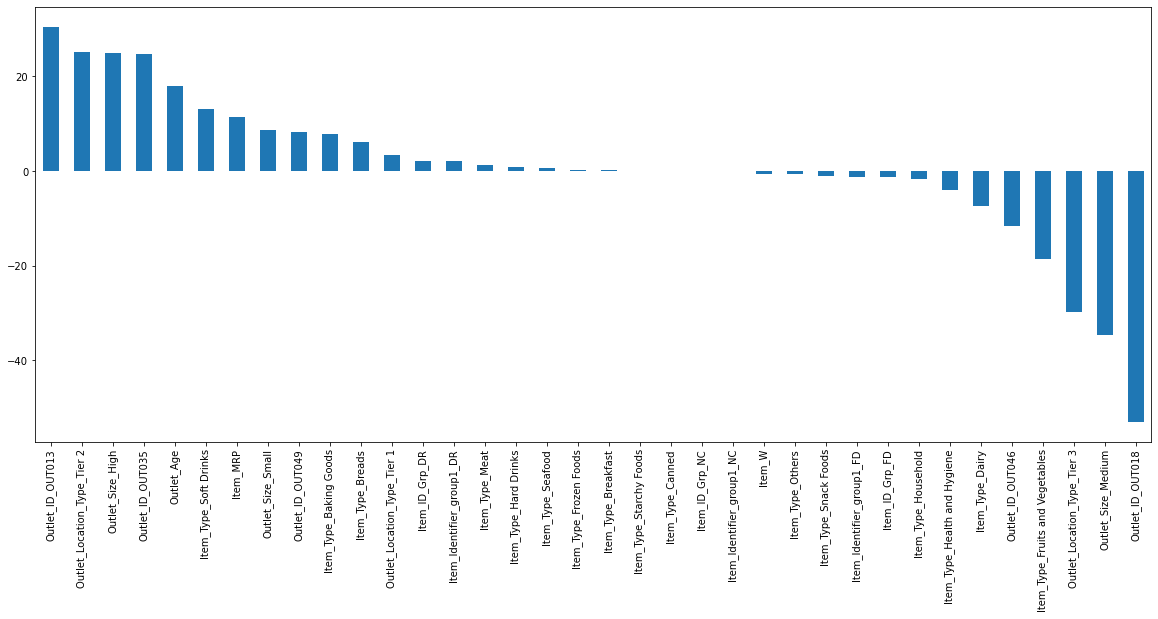

In [378]:
modelslope.plot(kind='bar')

In [362]:
model_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_net.fit(train_X,train_y)

ElasticNet()

In [412]:
model_grid = GradientBoostingRegressor()

In [413]:
parameters = { 'C':np.arange(0.1,10,0.1),}

In [414]:
grid = GridSearchCV(model_grid, parameters, cv=10)

In [420]:
grid = GridSearchCV(model_grid, parameters, scoring='accuracy', cv=10)

In [421]:
grid

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='accuracy')

In [423]:
grid.cv

10

In [424]:
grid.estimator

GradientBoostingRegressor()

In [527]:
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline


In [532]:
import joblib
joblib.dump(model, 'MegaMart.pkl')

['MegaMart.pkl']

In [533]:
from sklearn.decomposition import PCA

In [534]:
pca = PCA(n_components=2)

In [535]:
X = data_undersampled_nearmiss.drop(columns='Class')

NameError: name 'data_undersampled_nearmiss' is not defined

In [536]:
data_undersampled_nearmiss = pd.concat([train_X, train_y], axis = 1)

In [537]:
data_undersampled_nearmiss

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_ID_OUT013,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Age,Sales
73950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,-1.147211,1.454534,0.137005,1866.782218
60234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0.995054,-0.701850,0.286032,878.462649
13289,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1.145156,1.051305,0.137005,1384.916505
2121,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1.162548,-0.768062,-1.204240,3145.907205
85700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.839430,1.428056,0.435059,2419.536002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16111,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1.431939,0.631241,-1.353268,785.478120
65376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0.969366,0.405507,-0.608131,846.424656
27477,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1.179448,-0.853271,-0.459104,5811.867733
37225,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,-1.154530,-0.238277,-1.353268,2316.854508
